table deleted


<IPython.core.display.Javascript object>


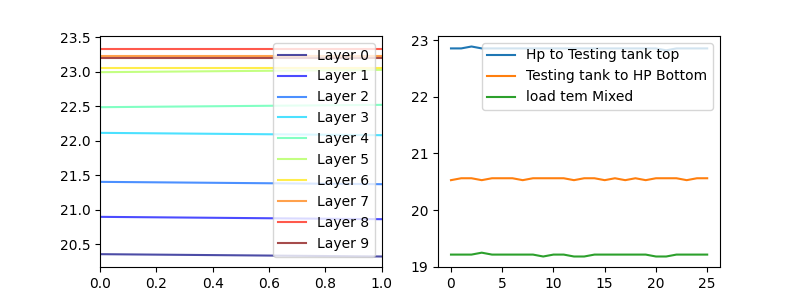

<IPython.core.display.Javascript object>


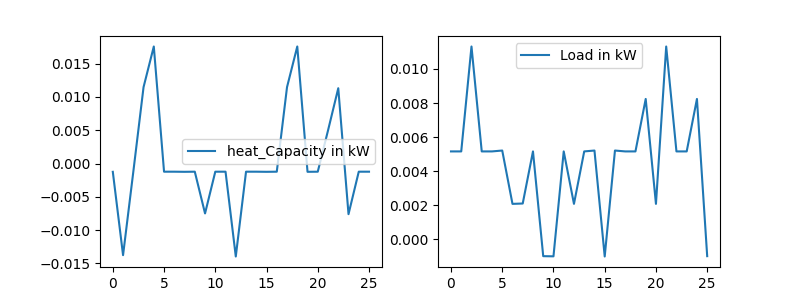

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
result is ((673, datetime.datetime(2021, 2, 11, 8, 7, 28), 18.4681, 22.8598, 20.5281, 18.8395, 21.1362, 22.6232, 19.2109, 18.8732, 19.2447, 22.488, 22.1162, 21.4065, 20.8997, 20.3592, 23.1979, 23.3331, 23.2317, 23.0626, 22.995),)
Load in kWh is: 7.167154474816182e-06
heat Capacity in kWh is:  -1.7354398165865836e-06
values in teh list are: 673
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
result is ((674, datetime.datetime(2021, 2, 11, 8, 7, 30), 18.4681, 22.8598, 20.5619, 18.8395, 21.1362, 22.6232, 19.2109, 18.8395, 19.2447, 22.5218, 22.0824, 21.3727, 20.8659, 20.3254, 23.1979, 23.3331, 23.2317, 23.0626, 23.0288),)
Load in kWh is: 1.4334308949632364

values in teh list are: 691
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
result is ((692, datetime.datetime(2021, 2, 11, 8, 8, 1), 18.4681, 22.8598, 20.5281, 18.8732, 21.1362, 22.657, 19.2109, 18.8395, 19.2447, 22.5218, 22.1162, 21.3727, 20.8997, 20.3592, 23.1979, 23.3331, 23.2317, 23.0626, 22.995),)
Load in kWh is: 8.492783475985779e-05
heat Capacity in kWh is:  -2.7515311576789407e-05
values in teh list are: 692
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
result is ((693, datetime.datetime(2021, 2, 11, 8, 8, 3), 18.4681, 22.8598, 20.5619, 18.8395, 21.1362, 22.657, 19.2109, 18.8395, 19.2447, 22.5218, 22.0824, 21.4065, 20.8659

KeyboardInterrupt: 

In [4]:
import time
import board
import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
from pylab import *
import pylab
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib
from collections import deque
#matplotlib.use('TkAgg')
%matplotlib notebook
#%matplotlib inline


#import time
import sys
import sqlite3
#from time import sleep

#import adafruit_ads1x15.ads1015 as ADS
import adafruit_ads1x15.ads1115 as ADS
from adafruit_ads1x15.analog_in import AnalogIn

import MySQLdb as db

HOST = "10.208.8.122"
PORT = 3306
USER = "yogi"
PASSWORD = "bittoo"
DB = "TemaccessToRemoteRp2"
'''
try:
    connection = db.Connection(host=HOST, port=PORT,
                               user=USER, passwd=PASSWORD, db=DB)

    c = connection.cursor()
    c.execute("SELECT * from temSensor")
    result = c.fetchall()
    for item in result:
        print (item)

except Exception as e:
    print (e)
'''
connectionL = db.connect(host="10.208.8.121",
                     user="yogi",
                     passwd="bittoo",
                     db="allSensors")

#c = conn.cursor()
connectionR = db.Connection(host=HOST, port=PORT,user=USER, passwd=PASSWORD, db=DB)

cR = connectionR.cursor()
cL =connectionL.cursor()

i2c = busio.I2C(board.SCL, board.SDA)

# Create the ADC object using the I2C bus
ads = ADS.ADS1115(i2c)

ads.gain = 1


cL.execute('DROP TABLE IF EXISTS flowReadings;')
print ('table deleted')


cL.execute('CREATE TABLE flowReadings(id INT AUTO_INCREMENT PRIMARY KEY, ts TIMESTAMP DEFAULT CURRENT_TIMESTAMP, flowHP FLOAT, flowLoad FLOAT);')


#cvsFileName = import os.path
#os.path.exists(file_path)

lol=[[], [], []]
flowRateLoad  = []

def flatten(l_of_l):
    T = l_of_l[0]
    flattend_l = [val for sublist in T for val in sublist]
    #print ('flattened list is =', flattend_l)
    return flattend_l

def mct(Lol):
    mHP = Lol[2]
    T = flatten(Lol)
    mL = Lol[1]
    #this is density as polynomial function of T
    p_LperH = [999.8473664794213 + 6.29265190e-02*x[2] - 8.42930922e-03*x[2]**2 + 6.77190849e-05*x[2]**3 \
 - 4.40840180e-07*x[2]**4 + 1.29302849e-09*x[2]**5 for x in T]

    #pV = [(999.8473664794213 + 6.29265190e-02*x[2] - 8.42930922e-03*x[2]**2 + 6.77190849e-05*x[2]**3 - 4.40840180e-07*x[2]**4 + 1.29302849e-09*x[2]**5)*2.7777e-07*y for x, y in zip(T, mHP)  ]
    # this is mass flow  in kg/S =  density*V(flow rate in m^3/sec)= d * (1000^-3/3600)
    mF_kgPerS =[ x*2.7777e-07*y for x, y in zip(p_LperH, mHP)]
    #this is Cp as functiono of T linear function
    cP_kjPerkgK = [4.253264761904763 - 0.00470305*b[2] for b in T]
    #mCT1 = sum([(4.253264761904763 - 0.00470305*b[2])*a*(b[2]-b[3]) for a, b in zip(mHP, T)])
    #mCT_kW = [(4.253264761904763 - 0.00470305*b[2])*a*(b[3]-b[4]) for a, b in zip(mHP, T)]
    #Cp*M*deltaT
    mCT_kW = [c*a*(b[3]-b[4]) for c, a, b in zip(cP_kjPerkgK,mF_kgPerS, T)]
    # sum(mct* 5/3600 (time stamp))  = kWh
    mCT2_kWh = sum([m*c*(dt[3]-dt[4])*0.0013888889 for m, c, dt in zip(mF_kgPerS,  cP_kjPerkgK, T)])
    print ('heat Capacity in kWh is: ', mCT2_kWh)
    
    #print (T[-1], mHP,'mCpDeltaT =', mCT)
    #print ('mCT is:',mCT)
    #print ('mF', mF_kgPerS, mHP[-1])
    #print (' mCT_kW is:', mCT_kW)
    #print ('mCTkWh is ',mCT2_kWh)
    return mCT_kW

l_id = []

def idGenerator(Id, l_id):
    if Id not in l_id:
       l_id.append(Id) 
    #print (l_id)
    return l_id

#df_conc= None
def dfs(Lol):
    mHP = Lol[2]
    T = flatten(Lol)
    mL = Lol[1]
    StartTemTestingtank = [ 'id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir', 'TtopSourceTank', \
'TloadTankMix','TTopTestTankLoadCir', 'TloadMix', 'TbottomSourceTank', 'TbottomTestTankLoadCir']
    l_T = ['T{}'.format(x) for x in range(0,10)]
    L = StartTemTestingtank +l_T
    df_mHP = DataFrame(mHP, columns=['flowHP'])
    df_mL = DataFrame(mL, columns=['flowLoad'])
    df_tem = DataFrame(T, columns = L)
    df_conc = pd.concat([df_tem, df_mHP, df_mL], axis=1)
    
    #print (df_mL)
    #print (df_mHP)
    #print (df_tem)
    #print ('TOut and Tin in Df is:', df_conc[['TTopTestTankLoadCir', 'TbottomTestTankLoadCir']])
    return df_conc

def list2df(lis, column_name = None):
    df  = pd.DataFrame(lis, columns = [column_name]) 
    return df
    
def toCsv(df_full, load_kW, heatCapacity_kW):
    df_Tem_Flow_Load_capacity_conc = pd.concat([df_full, load_kW, heatCapacity_kW], axis=1)
    import os.path
    import datetime
    file_name = 'csvFile_{}'.format(datetime.datetime.now().strftime("%Y_%m_%d"))
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    df_Tem_Flow_Load_capacity_conc.to_csv(filePath, header=True)
    return df_Tem_Flow_Load_capacity_conc

def Load_kWh(Lol):
    
    mHP = Lol[2]
    T = flatten(Lol)
    mL = Lol[1]
    #this is density as polynomial function of T
    p_LperH = [999.8473664794213 + 6.29265190e-02*x[10] - 8.42930922e-03*x[10]**2 + 6.77190849e-05*x[10]**3 \
 - 4.40840180e-07*x[10]**4 + 1.29302849e-09*x[10]**5 for x in T]
    #print ('denisty is:', p_LperH )
    #print ('Tem is:', [x[10] for x in T])
    # this is mass flow  in kg/S =  density*V(flow rate in m^3/sec)= d * (1000^-3/3600)
    mF_kgPerS =[ x*2.7777e-07*y for x, y in zip(p_LperH, mL)]
    #this is Cp as functiono of T linear function
    cP_kjPerkgK = [4.253264761904763 - 0.00470305*b[10] for b in T]
    #print ('Cp is:', cP_kjPerkgK)
    #Cp*M*deltaT
    mCT_kW = [c*a*(b[7]-b[10]) for c, a, b in zip(cP_kjPerkgK,mF_kgPerS, T)]
    mCT2_kWh = sum([m*c*(dt[7]-dt[10])*0.0013888889 for m, c, dt in zip(mF_kgPerS,  cP_kjPerkgK, T)])
    print ('Load in kWh is:', mCT2_kWh)
    return mCT_kW

'''
def Load_kWh(Lol):
    
    mHP = Lol[2]
    T = flatten(Lol)
    mL = Lol[1]
    #this is density as polynomial function of T
    p_LperH = [999.8473664794213 + 6.29265190e-02*x[7] - 8.42930922e-03*x[7]**2 + 6.77190849e-05*x[7]**3 \
 - 4.40840180e-07*x[7]**4 + 1.29302849e-09*x[7]**5 for x in T]
    p_LperH2 = [999.8473664794213 + 6.29265190e-02*x[10] - 8.42930922e-03*x[10]**2 + 6.77190849e-05*x[10]**3 \
 - 4.40840180e-07*x[10]**4 + 1.29302849e-09*x[10]**5 for x in T]
    #print ('denisty is:', p_LperH )
    #print ('Tem is:', [x[10] for x in T])
    # this is mass flow  in kg/S =  density*V(flow rate in m^3/sec)= d * (1000^-3/3600)
    mF_kgPerS =[ x*2.7777e-07*y for x, y in zip(p_LperH, mL)]
    #this is Cp as functiono of T linear function
    cP_kjPerkgK = [4.253264761904763 - 0.00470305*b[7] for b in T]
    #print ('Cp is:', cP_kjPerkgK)
    #Cp*M*deltaT
    mCT_kW = [c*a*(b[7]-b[10]) for c, a, b in zip(cP_kjPerkgK,mF_kgPerS, T)]
    mCT2_kWh = sum([m*c*(dt[7]-dt[10])*0.0013888889 for m, c, dt in zip(mF_kgPerS,  cP_kjPerkgK, T)])
    print ('Load in kWh is:', mCT2_kWh)
    TOut = [x[7] for x in T]
    Tin = [x[10] for x in T]
    #print ('tem Out in is values:',TOut[-1],  Tin[-1] )
    print ('denisty 1 is:',p_LperH )
    print ('denisty 2 is:',p_LperH2 )
    return mCT_kW
'''
def tankStrat(df):
    dfT = df.iloc[:, 11:-2]
    #print (dfT.columns)
    #print (dfT)
    dfT = dfT[['T4', 'T3', 'T2', 'T1', 'T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    dfT = dfT.rename({'T4':'T0', 'T3':'T1', 'T2':'T2', 'T1':'T3', 'T0':'T4', 'T9':'T5', 'T8':'T6',\
              'T7':'T7','T6':'T8','T5':'T9'}, axis='columns')
    #dfT = dfT[['T4', 'T3', 'T2', 'T1', 'T0', 'T5', 'T6', 'T7', 'T8', 'T9']]
    #dfT = dfT[['T4', 'T3', 'T2', 'T1', 'T0', 'T8', 'T9', 'T5', 'T6', 'T7']]
    #dfT = dfT.rename({'T4':'T0', 'T3':'T1', 'T2':'T2', 'T1':'T3', 'T0':'T4', 'T8':'T5', 'T9':'T6',\
    #           'T5':'T7','T6':'T8','T7':'T9'}, axis='columns')
    #dfT = dfT.rename({'T4':'T0', 'T3':'T1', 'T2':'T2', 'T1':'T3', 'T0':'T4', 'T5':'T5', 'T6':'T6',\
    #          'T7':'T7','T8':'T8','T9':'T9'}, axis='columns')
    #dfT.columns = ['T4', 'T3', 'T2', 'T1', 'T0', 'T5', 'T6', 'T7', 'T8', 'T9']
    #print (dfT)
    return dfT
#tankStratTem = tankStrat(df_conc)


    
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

#import logging
#logging.getLogger().setLevel(logging.CRITICAL)

# colors
cmap_name = "jet"
scm = create_color_step_obj(cmap_name, 10)

plt.ion()
#plt.rcParams["figure.figsize"]=5,5
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 3
def plotObject(df, ax, fig, alpha =0.7, scm=None):
    ax.clear()
    for i in range (0, df.shape[1]):
        ax.plot(df.index, df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Layer ' + str(i))
        ax.legend(bbox_to_anchor=(0.4,0.8))
    fig.canvas.draw()
    ax.legend()
    #plt.legend(loc='upper left')
    return fig, ax
    
# initialize figure and interactivity
fig = plt.figure(1)
fig2 = plt.figure(2)


ax = fig.add_subplot(121)
ax_2 = fig.add_subplot(122)
ax2 = fig2.add_subplot(122)
ax2_1 = fig2.add_subplot(121)

fig.canvas.draw()
#plt.ion()

fig.show()

ax.legend(loc='best')
ax.set_xlabel('Index')
ax.set_ylabel('Tem, C', color='r')
#################################
#Plot for HPin, Hpout, TmixL tem.

fig.show()
fig.canvas.draw()
ax_2.legend(loc='best')
ax_2.set_xlabel('Index')
ax_2.set_ylabel('Load in kW', color='r')
def plotObject_Tem_HpAndLoad(df, ax_2, fig):
    ax_2.clear()
    ax_2.plot(df.index, df.iloc[:, 3], label = 'Hp to Testing tank top')
    ax_2.plot(df.index, df.iloc[:, 4], label = 'Testing tank to HP Bottom')
    ax_2.plot(df.index, df.iloc[:, 8], label = 'load tem Mixed')
    
    ax_2.legend(bbox_to_anchor=(0.4,0.8))
    fig.canvas.draw()
    ax_2.legend()
    #plt.legend(loc='upper left')
    return fig, ax_2
##################################

#fig2 = plt.figure(2)

#plt.ion()

fig2.show()
fig2.canvas.draw()
ax2.legend(loc='best')
ax2.set_xlabel('Index')
ax2.set_ylabel('Load in kW', color='r')
def plotObject_Load(df, ax2, fig2):
    ax2.clear()
    ax2.plot(df.index, df.iloc[:, -2], label = 'Load in kW')
    ax2.legend(bbox_to_anchor=(0.4,0.8))
    fig2.canvas.draw()
    ax2.legend()
    #plt.legend(loc='upper left')
    return fig2, ax2
    
# initialize figure and interactivity
####Plot for heat_Capacity:

fig2.show()
fig2.canvas.draw()
ax2_1.legend(loc='best')
ax2_1.set_xlabel('Index')
ax2_1.set_ylabel('Heat_Capacity in kW', color='r')
def plotObject_Heat_Capacity(df, ax2_1, fig2):
    ax2_1.clear()
    ax2_1.plot(df.index, df.iloc[:, -1], label = 'heat_Capacity in kW')
    ax2_1.legend(bbox_to_anchor=(0.4,0.8))
    fig2.canvas.draw()
    ax2_1.legend()
    #plt.legend(loc='upper left')
    return fig2, ax2_1
############


'''
def plotObject(df, ax1,  fig, alpha =0.7, scm=None):
    #ax2.clear()
    ax1.clear()
    for i in range (0, df.shape[1]):
        ax1.plot(df.index, df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Layer ' + str(i+1))
        ax1.legend(bbox_to_anchor=(0.4,0.8))
    
    #ax2.plot(dfFlowtem.index, dfFlowtem.iloc[:, 1])
    #ax3.plot(dfFlowtem.index, dfFlowtem.iloc[:, 2])
    
    fig.canvas.draw()
    #ax2.legend()
    #ax3.legend()
    #legend_without_duplicate_labels(ax2)
    #plt.legend(loc='upper left')
    return fig, ax1, ax2, ax3


# initialize figure and interactivity
#fig = plt.figure()
fig, ax1 = plt.subplots(1)
plt.ion()

fig.show()
fig.canvas.draw()
ax1.legend(loc='best')
ax1.set_xlabel('Index')
ax1.set_ylabel('Tem, C', color='r')


ax2.legend(loc='best')
ax2.set_xlabel('Index')
ax2.set_ylabel('Tank outlet, C', color='r')


ax3.legend(loc='best')
ax3.set_xlabel('Index')
ax3.set_ylabel('TankInletTem, C', color='r')
'''

#plt.legend(loc='best')


while True:
    #c.execute("INSERT INTO flowReadings(flowHp, flowLoad) VALUES(?,?,?,?)", (chan2.voltage, chan1.voltage))
    #connection.commit()
    chan1 = AnalogIn(ads, ADS.P0)
    chan2 = AnalogIn(ads, ADS.P1)

    chan1Vol = chan1.voltage
    chan1curr = chan1Vol/159.42

    chan2Vol = chan2.voltage
    chan2curr=chan2Vol/159.65
    #flow1 = ((chan1Vol/159.42)*1000 -4)/16*1000
    flow1 = ((chan1Vol/159.42)-0.003956)/0.0000159
    #flow2 = ((chan2Vol/159.65)*1000 -4)/16*4000 +20
    #flow2 = ((chan2Vol/159.65)- 0.0005468893873066417)/1.09561608e-05
    flow2 = ((chan2Vol/159.65)- 0.003973767754877122)/5.3038815e-06
    cL.execute("INSERT INTO flowReadings(flowHp, flowLoad) VALUES(%s, %s)", (flow2, flow1))
    connectionL.commit()
    #print('flow HP:',"{:>5}\t{:>5.3f}".format(chan2.value, chan2.voltage), '\n\n')
    #print('flow load:',"{:>5}\t{:>5.3f}".format(chan1.value, chan1.voltage, '\n\n'))
    print('flow rates load is = ',chan1Vol, chan1curr,flow1 )
    print('flow rates HP is = ',chan2Vol, chan2curr,flow2 )

    connectionR = db.Connection(host=HOST, port=PORT,user=USER, passwd=PASSWORD, db=DB)
    cR = connectionR.cursor()
    #c.execute("SELECT * from temSensor")
    cR.execute("SELECT * FROM temSensor ORDER BY id DESC LIMIT 1")
    result = cR.fetchall()
    print ('result is',result)
    id = result[0][0]
    idGenerator(id, l_id)
    #print ('id is :', id)
    flowRateLoad.append(flow1)

    if lol[0] ==[] or id < lol[0][-1][0][0] :
        lol[0].append(result)
        #print (lol)
        lol[1].append(flow1)
        lol[2].append(flow2)
    elif lol[0] != [] and id > lol[0][-1][0][0]:

        lol[0].append(result)
        lol[1].append(flow1)
        lol[2].append(flow2)


    #mct(lol)
    #Load = Load_kWh(lol)
    #print ('load in kWh is:', Load)
    #print ('lol is:',lol)
    #print ('df of tem is:',df_tem)
    #print ('df is:', tankStrat(dfs(lol)))
    df = tankStrat(dfs(lol))
    #restTem = InletTem(dfs(lol))
    #print (df)
    GrossDf = toCsv(dfs(lol), list2df(Load_kWh(lol), 'Load_kW'), list2df(mct(lol),'Heat_Capacity_kW'))
    # Plot tem values as a seperate first fig
    fig, ax = plotObject(df, ax,  fig, alpha=0.7, scm=scm)
    #plot load_kW in different fig2 
    fig2, ax2 = plotObject_Load(GrossDf, ax2, fig2)
    #Plot heat_Capacity in the same fig as fig2 but as a subplot
    fig2, ax2_1 =plotObject_Heat_Capacity(GrossDf, ax2_1, fig2)
    #This plot the HP in and out and tmixL laod tem.
    fig, ax_1 = plotObject_Tem_HpAndLoad(GrossDf, ax_2, fig)
    #print ('df whole is:', dfs(lol))
    
    #print ('df is:', df)
    #plot(tankStrat(dfs(lol)), plotObject(tankStrat(dfs(lol))))
    #plotObject(tankStrat(dfs(lol)))for i in range (0, 10):
    #x = tankStrat(dfs(lol)).index[-1]
    #y =tankStrat(dfs(lol)).iloc[-1]
    #print ('x is:',x,'y is :',y)
    #restTem = InletTem(dfs(lol))
    #print ('rets of inlet tem values are:', restTem.iloc[:, 1])
    print ('values in teh list are:', lol[0][-1][0][0])
    print('________________________________________________________________')
    time.sleep(0.05)

In [11]:
1+1

2